In [1]:
# A MUST-DO to disable annoying TensorFlow warning messages.
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import numpy as np
np.set_printoptions(suppress=True, precision=5)

In [3]:
from mtcnn.utils.tensorflow import set_gpu_memory_growth

In [4]:
set_gpu_memory_growth()

In [5]:
import matplotlib.pyplot as plt

In [6]:
from mtcnn import MTCNN
from mtcnn.stages import StagePNet, StageRNet, StageONet
from mtcnn.utils.plotting import plot

In [7]:
from mtcnn.utils.images import load_images_batch

In [8]:
images = load_images_batch(["tests/images/no-faces.jpg"])

In [9]:
mtcnn = MTCNN(device="/CPU:0")

In [15]:
%%time
result_a = mtcnn.detect_faces("tests/images/ivan.jpg", output_type="json", 
                              box_format="xyxy", 
                              fit_to_image=True, scale_factor=0.709, limit_boundaries_landmarks=True)
result_a

CPU times: user 643 ms, sys: 97.4 ms, total: 741 ms
Wall time: 361 ms


[{'box': [276, 92, 326, 155],
  'confidence': 0.9999972581863403,
  'keypoints': {'nose': [304, 131],
   'mouth_right': [314, 141],
   'right_eye': [315, 114],
   'left_eye': [290, 116],
   'mouth_left': [297, 143]}},
 {'box': [9, 72, 45, 114],
  'confidence': 0.8249910473823547,
  'keypoints': {'nose': [28, 93],
   'mouth_right': [36, 102],
   'right_eye': [36, 85],
   'left_eye': [20, 87],
   'mouth_left': [23, 104]}}]

In [13]:
import numpy as np
np.empty((0, 16))

array([], shape=(0, 16), dtype=float64)

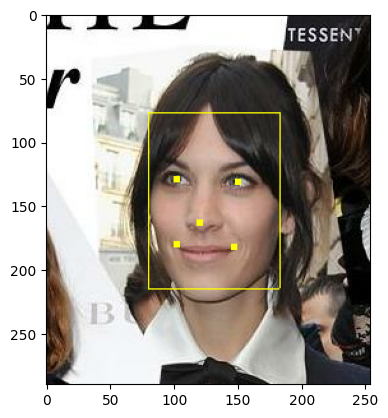

In [23]:
plt.imshow(plot(images[0], result_a[0], input_as_width_height=False))

In [25]:
result_a

array([[  0.     ,  80.33213,  76.53361, 182.71686, 215.44046,   0.99863,
        101.55515, 150.06621, 119.97188, 102.0798 , 147.44276, 128.53476,
        130.96198, 163.0137 , 179.62802, 182.46007]])

In [23]:
result_b

NameError: name 'result_b' is not defined

In [22]:
from mtcnn.utils.bboxes import parse_bbox

In [23]:
result_a[0]

[{'box': [80, 77, 102, 139],
  'confidence': 0.9986299276351929,
  'keypoints': {'nose': [120, 163],
   'mouth_right': [147, 182],
   'right_eye': [150, 131],
   'left_eye': [102, 129],
   'mouth_left': [102, 180]}}]

In [24]:
parse_bbox(result_a[0][0]['box'], as_width_height=False)

array([ 80,  77, 182, 216])

In [25]:
parse_bbox(result_b[0], as_width_height=False)

array([ 80,  77, 183, 215])

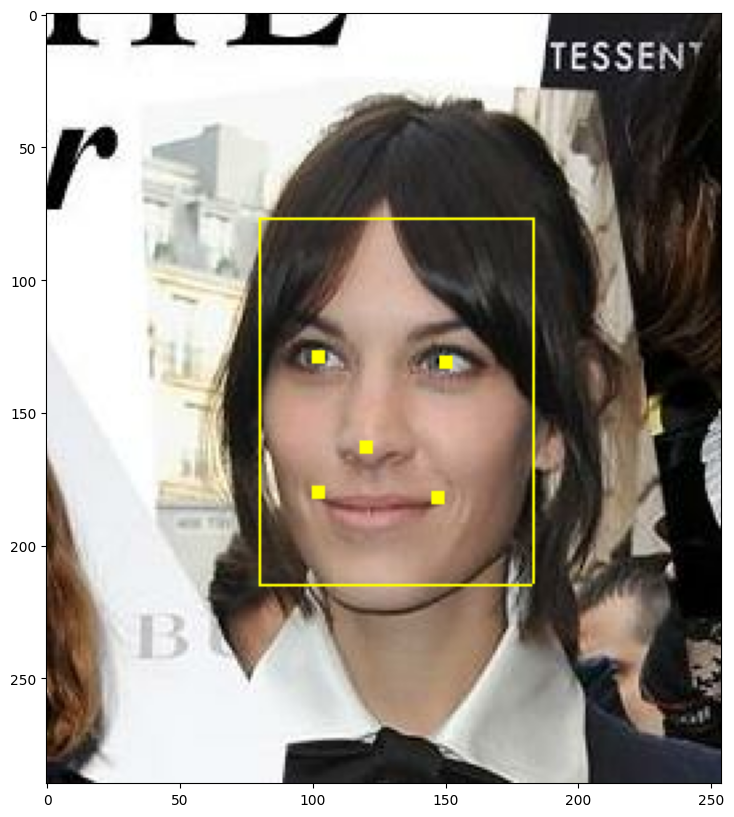

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(plot(images[0], result_b[0]).astype(np.uint8))

In [29]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(plot(images[0], result[0]).astype(np.uint8))

NameError: name 'result' is not defined

In [1]:
from mtcnn.network import ONet


2024-10-02 19:49:38.117128: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-02 19:49:38.126847: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 19:49:38.138668: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 19:49:38.142230: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 19:49:38.150790: I tensorflow/core/platform/cpu_feature_guar

In [4]:
onet = ONet()

In [5]:
onet.summary()

Model: "o_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu1 (PReLU)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling1 (MaxPooling2D)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu2 (PReLU)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling2 (MaxPooling2D)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu3 (PReLU)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling3 (MaxPooling2D)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu4 (PReLU)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute (Permute)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten4 (Flatten)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc5 (Dense)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu5 (PReLU)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc6-1 (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc6-2 (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc6-3 (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
result[2]

[{'box': [78, 76, 105, 141],
  'confidence': 0.9955390095710754,
  'keypoints': {'nose': [121, 163],
   'mouth_right': [148, 183],
   'right_eye': [151, 130],
   'left_eye': [102, 127],
   'mouth_left': [103, 181]}}]

In [17]:
import joblib 
joblib.dump(result, "result_stagepnet.zlib", compress=("lz4", 1))

['result_stagepnet.zlib']

In [15]:
result

array([[   0.     ,  538.29971,  266.42227,  637.764  ,  365.88657,
           1.     ],
       [   0.     ,  512.12544, 1068.30895,  613.84895, 1170.03246,
           1.     ],
       [   0.     ,   63.82709,  250.10843,  176.34699,  362.62833,
           1.     ],
       ...,
       [   0.     ,   93.33635, 1129.10526,  139.49408, 1175.26299,
           0.60082],
       [   0.     , 1223.55854,  696.44765, 1254.2971 ,  727.1862 ,
           0.60032],
       [   0.     ,  506.29064,  557.12349,  536.932  ,  587.76485,
           0.60022]])

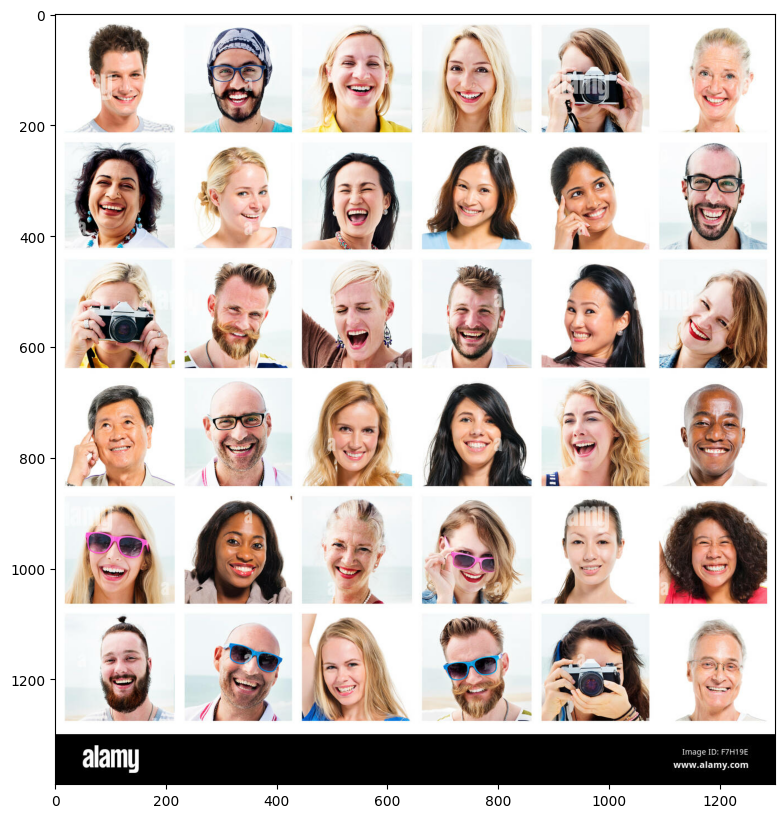

In [19]:
plt.imshow(image.astype(int))

In [9]:
def discard_out_of_bbox_landmarks(bboxes_batch):
    """
    Discards bounding boxes whose landmarks are out of the bounding box.
    
    Args:
        bboxes_batch (np.ndarray): Array of bounding boxes and landmarks with the format:
                                   [image_id, x1, y1, x2, y2, confidence, landmark1_x, landmark2_x, ..., landmark5_x, landmark1_y, ..., landmark5_y]

    Returns:
        np.ndarray: Array with valid bounding boxes and landmarks (landmarks within bounding box).
    """
    # Bounding box limits
    x1, y1, x2, y2 = bboxes_batch[:, 1], bboxes_batch[:, 2], bboxes_batch[:, 3], bboxes_batch[:, 4]

    # Extraemos las coordenadas de los landmarks:
    landmarks_x = bboxes_batch[:, 6:11]  # Las primeras 5 columnas de landmarks son las coordenadas x
    landmarks_y = bboxes_batch[:, 11:16] # Las siguientes 5 columnas son las coordenadas y

    # Verificamos si todos los landmarks están dentro del bounding box
    landmarks_in_bbox = np.all((landmarks_x >= x1[:, None]) & (landmarks_x <= x2[:, None]) & 
                               (landmarks_y >= y1[:, None]) & (landmarks_y <= y2[:, None]), axis=1)

    # Filtramos solo los bounding boxes que tienen todos los landmarks dentro
    return bboxes_batch[landmarks_in_bbox]

# PNET USAGE

This notebook shows the PNet usage 

In [10]:
from mtcnn.utils.tensorflow import load_weights
from mtcnn.network import PNet

In [11]:
#pnet = PNet()
#pnet.build()
#pnet.set_weights(load_weights("pnet.lz4"))

In [12]:
#pnet.summary()

In [13]:
from mtcnn.stages import StagePNet, StageRNet, StageONet

In [14]:
stage_pnet = StagePNet()

# EJEMPLO 1

In [15]:
from mtcnn.utils.images import load_images_batch, build_scale_pyramid, apply_scales, extract_patches, standarize_batch 

In [16]:
from mtcnn.utils.bboxes import generate_bounding_box, upscale_bboxes, smart_nms_from_bboxes, \
                               resize_to_square, replace_confidence, adjust_bboxes, pick_matches, to_json

In [17]:
import matplotlib.pyplot as plt

In [18]:
import numpy as np

In [19]:
%%time
images_uri = ["example.jpg"]
images_raw = load_images_batch(images_uri)
images_normalized, images_oshapes, pad_param = standarize_batch(images_raw, normalize=True)
images_shapes = np.stack([images_normalized.shape[1:]] * images_normalized.shape[0])

CPU times: user 84 ms, sys: 22.8 ms, total: 107 ms
Wall time: 62.4 ms


In [20]:
bboxes_batch = stage_pnet(images_normalized, images_oshapes)

W0000 00:00:1727175824.225565  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175824.255253  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175824.255784  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175824.270601  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175824.271806  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175824.273163  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175824.273936  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175824.276260  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175824.458448  213442 gp

In [21]:
bboxes_batch.shape

(1086, 6)

# RNET USAGE

This notebook shows the RNet usage 

In [22]:
from mtcnn.utils.tensorflow import load_weights
from mtcnn.network import RNet

In [23]:
stage_rnet = StageRNet()

In [24]:
patches = extract_patches(images_normalized, bboxes_batch)

In [25]:
#rnet = RNet()
#rnet.build()
#rnet.set_weights(load_weights("rnet.lz4"))

In [26]:
%%time
bboxes_offsets, scores = stage_rnet.model(patches)

CPU times: user 119 ms, sys: 7.9 ms, total: 127 ms
Wall time: 122 ms


W0000 00:00:1727175825.984311  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175825.984831  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175825.985265  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175825.985741  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175825.986167  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175825.986595  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175825.987019  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175825.987628  213442 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175825.988240  213442 gp

In [27]:
bboxes_batch = replace_confidence(bboxes_batch, scores)

In [28]:
bboxes_batch = pick_matches(bboxes_batch, score_threshold=0.7)

In [30]:
bboxes_batch.shape

(10, 6)

In [34]:
bboxes_batch

array([[   0.     ,   63.5    ,  250.     ,  175.5    ,  362.     ,
           0.99608],
       [   0.     ,   80.5    ,   68.     ,  177.5    ,  165.     ,
           0.99845],
       [   0.     ,  317.     ,  265.     ,  425.     ,  373.     ,
           0.91386],
       [   0.     ,  278.5    ,  658.     ,  410.5    ,  790.     ,
           0.96192],
       [   0.     ,   60.     ,  240.     ,  196.     ,  376.     ,
           0.88221],
       [   0.     ,   31.5    ,  861.     ,  213.5    , 1043.     ,
           0.9452 ],
       [   0.     ,   60.5    ,   37.     ,  208.5    ,  185.     ,
           0.96237],
       [   0.     ,  107.     ,   80.     ,  177.     ,  150.     ,
           0.77663],
       [   0.     ,   23.5    ,  227.     ,  194.5    ,  398.     ,
           0.85619],
       [   0.     ,  332.5    ,  314.     ,  403.5    ,  385.     ,
           0.88446]])

In [31]:
bboxes_batch2 = smart_nms_from_bboxes(bboxes_batch, threshold=0.7, method="union", initial_sort=True)

In [33]:
bboxes_batch2

array([[   0.     ,   80.5    ,   68.     ,  177.5    ,  165.     ,
           0.99845],
       [   0.     ,   63.5    ,  250.     ,  175.5    ,  362.     ,
           0.99608],
       [   0.     ,   60.5    ,   37.     ,  208.5    ,  185.     ,
           0.96237],
       [   0.     ,  278.5    ,  658.     ,  410.5    ,  790.     ,
           0.96192],
       [   0.     ,   31.5    ,  861.     ,  213.5    , 1043.     ,
           0.9452 ],
       [   0.     ,  317.     ,  265.     ,  425.     ,  373.     ,
           0.91386],
       [   0.     ,  332.5    ,  314.     ,  403.5    ,  385.     ,
           0.88446],
       [   0.     ,   60.     ,  240.     ,  196.     ,  376.     ,
           0.88221],
       [   0.     ,   23.5    ,  227.     ,  194.5    ,  398.     ,
           0.85619],
       [   0.     ,  107.     ,   80.     ,  177.     ,  150.     ,
           0.77663]])

In [42]:
from mtcnn.utils.bboxes import iou

In [44]:
iou(bboxes_batch2).round(2)

array([[1.  , 0.23, 0.42, 0.  , 0.04, 0.  , 0.  , 0.2 , 0.17, 0.64],
       [0.23, 1.  , 0.14, 0.  , 0.18, 0.  , 0.  , 0.8 , 0.61, 0.19],
       [0.42, 0.14, 1.  , 0.  , 0.03, 0.  , 0.  , 0.15, 0.13, 0.31],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.27, 0.26, 0.  , 0.  , 0.  ],
       [0.04, 0.18, 0.03, 0.  , 1.  , 0.  , 0.  , 0.21, 0.23, 0.04],
       [0.  , 0.  , 0.  , 0.27, 0.  , 1.  , 0.59, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.26, 0.  , 0.59, 1.  , 0.  , 0.  , 0.  ],
       [0.2 , 0.8 , 0.15, 0.  , 0.21, 0.  , 0.  , 1.  , 0.75, 0.17],
       [0.17, 0.61, 0.13, 0.  , 0.23, 0.  , 0.  , 0.75, 1.  , 0.14],
       [0.64, 0.19, 0.31, 0.  , 0.04, 0.  , 0.  , 0.17, 0.14, 1.  ]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9936351..0.99609375].


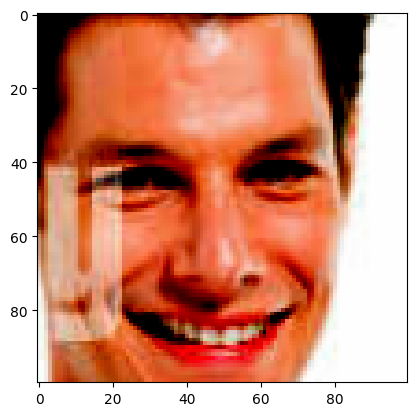

In [41]:
plt.imshow(extract_patches(images_normalized, bboxes_batch2, expected_size=(100,100))[2])

In [32]:
bboxes_batch.shape

(10, 6)

In [52]:
bboxes_batch = resize_to_square(bboxes_batch)

In [25]:
bboxes_batch = stage_rnet(images_normalized, bboxes_batch)

W0000 00:00:1727175404.243186  212937 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175404.243868  212937 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175404.244392  212937 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175404.244998  212937 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175404.245505  212937 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175404.246019  212937 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175404.246524  212937 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175404.247376  212937 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175404.248219  212937 gp

# ONET

In [53]:
from mtcnn.network import ONet

In [54]:
onet = ONet()
onet.build()
onet.set_weights(load_weights("onet.lz4"))
onet.summary()

Model: "o_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu1 (PReLU)                  │ (None, 46, 46, 32)     │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling1 (MaxPooling2D)      │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu2 (PReLU)                  │ (None, 21, 21, 64)     │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling2 (MaxPooling2D)      │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu3 (PReLU)                  │ (None, 8, 8, 64)       │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling3 (MaxPooling2D)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 3, 3, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu4 (PReLU)                  │ (None, 3, 3, 128)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute (Permute)               │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten4 (Flatten)              │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc5 (Dense)                     │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu5 (PReLU)                  │ (None, 256)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc6-1 (Dense)                   │ (None, 4)              │         1,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc6-2 (Dense)                   │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc6-3 (Dense)                   │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,040 (1.48 MB)

 Trainable params: 389,040 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
bboxes_batch

array([[   0.     ,   80.5    ,   68.     ,  177.5    ,  165.     ,
           0.99845],
       [   0.     ,   63.5    ,  250.     ,  175.5    ,  362.     ,
           0.99608],
       [   0.     ,   60.5    ,   37.     ,  208.5    ,  185.     ,
           0.96236],
       [   0.     ,  278.5    ,  658.     ,  410.5    ,  790.     ,
           0.96192],
       [   0.     ,   31.5    ,  861.     ,  213.5    , 1043.     ,
           0.9452 ],
       [   0.     ,  317.     ,  265.     ,  425.     ,  373.     ,
           0.91386],
       [   0.     ,  332.5    ,  314.     ,  403.5    ,  385.     ,
           0.88447],
       [   0.     ,   60.     ,  240.     ,  196.     ,  376.     ,
           0.88221],
       [   0.     ,   23.5    ,  227.     ,  194.5    ,  398.     ,
           0.85619],
       [   0.     ,  107.     ,   80.     ,  177.     ,  150.     ,
           0.77663]])

In [56]:
patches = extract_patches(images_normalized, bboxes_batch, expected_size=(48, 48))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8941512..0.99609375].


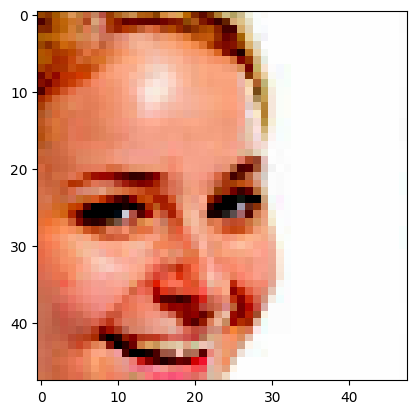

In [75]:
plt.imshow(patches[5])

In [76]:
%%time
bboxes_offsets, face_landmarks, scores = onet(patches)

CPU times: user 133 ms, sys: 8.12 ms, total: 142 ms
Wall time: 135 ms


W0000 00:00:1727175662.434244  213123 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175662.434718  213123 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175662.435071  213123 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175662.435410  213123 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175662.435743  213123 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175662.436067  213123 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175662.436388  213123 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175662.436749  213123 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727175662.437077  213123 gp

In [77]:
from mtcnn.utils.landmarks import adjust_landmarks

In [78]:
good_bboxes_batch = bboxes_batch.copy()

In [79]:
# 1. We replace the confidence of the bboxes by the one provided by this network
bboxes_batch = replace_confidence(bboxes_batch, scores)

# 2. We adjust the bounding boxes by the refinement proposed by this network
bboxes_batch = adjust_bboxes(bboxes_batch, bboxes_offsets)

# 3. We combine the face landmarks with the bboxes_batch tensor
bboxes_batch = np.concatenate([bboxes_batch, face_landmarks], axis=-1)

# 4. We pick the ones with the correct threshold (based on the new network's threshold)
bboxes_batch = pick_matches(bboxes_batch, scores_column=5, score_threshold=0.7)

In [81]:
bboxes_batch.shape

(9, 16)

In [82]:
new_patches = extract_patches(images_normalized, bboxes_batch[:1], expected_size=(50,50))

In [83]:
from mtcnn.utils.plot import plot_bbox

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99000883..0.99609375].


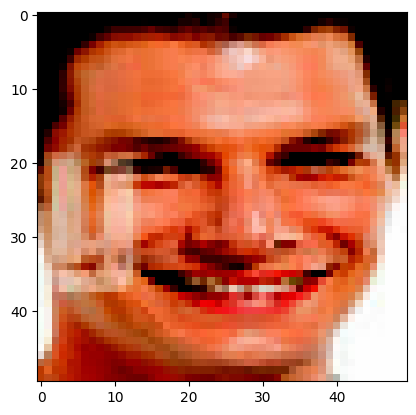

In [86]:
new_patches = extract_patches(images_normalized, bboxes_batch[:1], expected_size=(50,50))
plt.imshow(new_patches[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99609375..0.99609375].


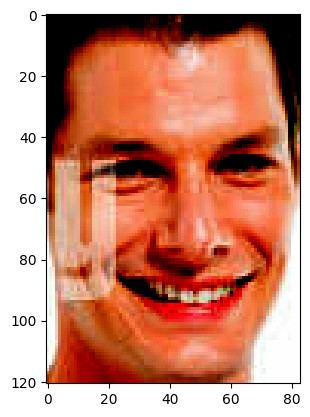

In [94]:
i = 0
plt.imshow(images_normalized[0, int(bboxes_batch[i,2]):int(bboxes_batch[i,4]), int(bboxes_batch[i,1]):int(bboxes_batch[i,3])])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99609375..0.99609375].


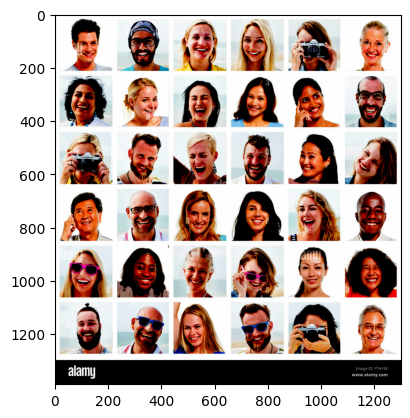

In [96]:
plt.imshow(images_normalized[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99609375..0.99609375].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.98236746..0.99609375].


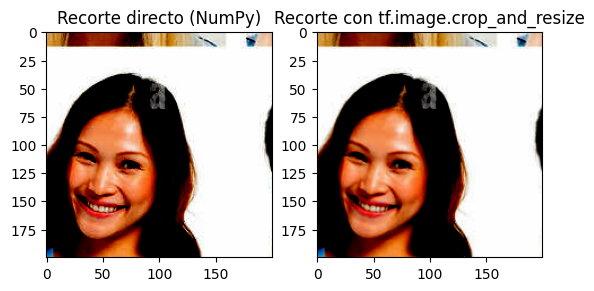

In [141]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Bounding box [x1, y1, x2, y2]
example_bbox = np.asarray([[700, 200, 900, 400]])

# Coordenadas para recorte directo
x1, y1, x2, y2 = example_bbox[0]

# Coordenadas normalizadas para tf.image.crop_and_resize
selector = [1, 0, 3, 2]
shape = images_normalized.shape[1:]  # Altura y ancho de la imagen
example_bbox_norm = example_bbox[:, selector] / np.asarray([[shape[selector[1]], shape[selector[0]], shape[selector[1]], shape[selector[0]]]])

# Recorte con tf.image.crop_and_resize (200x200)
patch_new = tf.image.crop_and_resize(images_normalized, 
                                     example_bbox_norm, 
                                     np.asarray([0]), 
                                     crop_size=(200, 200))[0]

# Recorte manual con NumPy sin redimensionar
patch_numpy = images_normalized[0, y1:y2, x1:x2]

# Mostrar el recorte de NumPy y TensorFlow
plt.subplot(121)
plt.imshow(patch_numpy)
plt.title("Recorte directo (NumPy)")

plt.subplot(122)
plt.imshow(patch_new)
plt.title("Recorte con tf.image.crop_and_resize")

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99609375..0.99609375].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9890389..0.99609375].


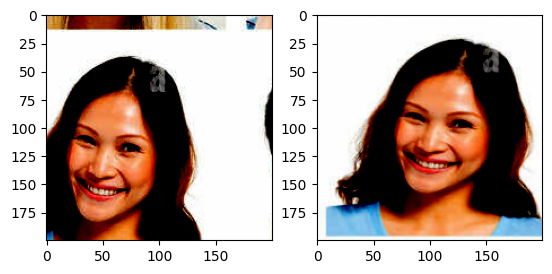

In [139]:
import matplotlib.pyplot as plt
import tensorflow as tf

                 #x1  y1   x2   y2 
example_bbox = np.asarray(
                [[700, 200, 900, 400]]
               )


selector = [1, 0, 3, 2]
shape = images_normalized.shape[1:]
example_bbox_norm = example_bbox[:, selector] / np.asarray([[shape[selector[0]], shape[selector[1]], shape[selector[0]], shape[selector[1]]]])

patch_new = tf.image.crop_and_resize(images_normalized, 
                         example_bbox_norm, 
                         np.asarray([0]), 
                         crop_size=(200,200))[0]
plt.subplot(121)
plt.imshow(images_normalized[0, example_bbox[0,1]:example_bbox[0,3], example_bbox[0,0]:example_bbox[0,2]])
plt.subplot(122)
plt.imshow(patch_new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99609375..0.99609375].


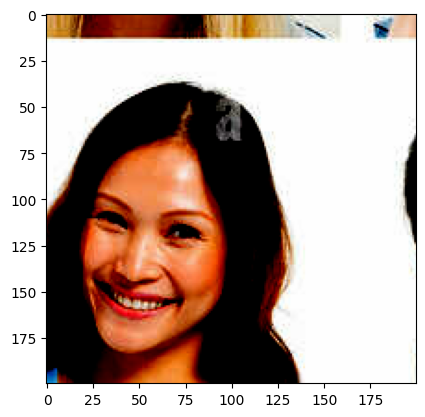

In [110]:
example_bbox_norm

array([[0.15385, 0.14388, 0.30769, 0.28777]])

In [123]:
example_bbox

array([[700, 200, 900, 400]])

In [124]:
crafted_bbox = np.asarray([[0, 700, 200, 900, 400]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9766551..0.99609375].


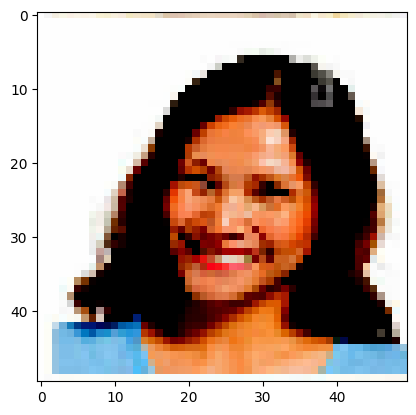

In [126]:
plt.imshow(extract_patches(images_normalized, crafted_bbox, expected_size=(50, 50))[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.98436934..0.99609375].


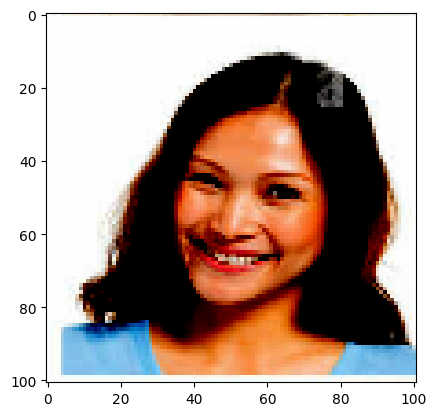

In [133]:
plt.imshow(patch_new)

In [ ]:
# Calcula las coordenadas absolutas de los bounding boxes en píxeles
y1_abs = int(bboxes_batch[0, 2] * images_normalized.shape[1])  # Normalized y1 to absolute
y2_abs = int(bboxes_batch[0, 4] * images_normalized.shape[1])  # Normalized y2 to absolute
x1_abs = int(bboxes_batch[0, 1] * images_normalized.shape[2])  # Normalized x1 to absolute
x2_abs = int(bboxes_batch[0, 3] * images_normalized.shape[2])  # Normalized x2 to absolute

# Extraer el patch directamente de la imagen utilizando coordenadas absolutas
patch = images_normalized[0, y1_abs:y2_abs, x1_abs:x2_abs]

In [89]:

x1 = int(bboxes_batch[0, 1] * images_normalized[0].shape[0])
y1 = int(bboxes_batch[0, 2] * images_normalized[0].shape[1])
x2 = int(bboxes_batch[0, 3] * images_normalized[0].shape[0])
y2 = int(bboxes_batch[0, 4] * images_normalized[0].shape[1])

(x1,y1,x2,y2)

(1374698, 592196, 1495881, 744128)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99609375..0.99609375].


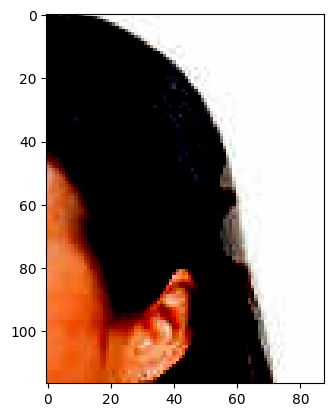

In [91]:
y1 = int(bboxes_batch[0, 2])
x1 = int(bboxes_batch[0, 1])
y2 = int(bboxes_batch[0, 4])
x2 = int(bboxes_batch[0, 3])

# Usa las coordenadas corregidas
plt.imshow(images_normalized[0, y1:y2, x1:x2])

In [90]:
images_normalized[0].shape

(1390, 1300, 3)

In [ ]:
# Mostrar la imagen recortada
plt.imshow(patch)
plt.show()

In [69]:
bboxes_batch

array([[   0.     ,  988.99207,  455.53574, 1076.17383,  572.4068 ,
           0.99999,    0.17952,    0.5164 ,    0.22069,    0.18407,
           0.5387 ,    0.34249,    0.3541 ,    0.59194,    0.74065,
           0.75205],
       [   0.     ,  540.25159,  256.52652,  627.75183,  375.87097,
           0.99958,    0.27283,    0.60487,    0.4326 ,    0.30021,
           0.65013,    0.41648,    0.39455,    0.56582,    0.75947,
           0.73415],
       [   0.     ,   70.07036,  844.10199,  167.9352 ,  977.23798,
           0.99237,    0.34752,    0.68868,    0.47197,    0.30751,
           0.66125,    0.35438,    0.39661,    0.5459 ,    0.69438,
           0.7375 ],
       [   0.     ,   86.92046, 1043.18628,  173.87885, 1159.85107,
           0.99989,    0.28506,    0.63974,    0.44169,    0.30745,
           0.67642,    0.38863,    0.36666,    0.56561,    0.71121,
           0.70776],
       [   0.     ,  760.35059,  451.75266,  854.65405,  576.35248,
           0.99986,    0.3152 , 

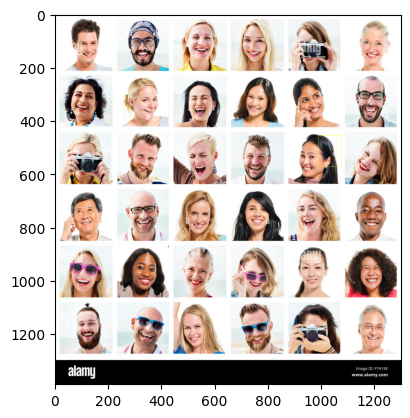

In [66]:
plt.imshow(plot_bbox(images_raw[0], bboxes_batch[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.97424775..0.99609375].


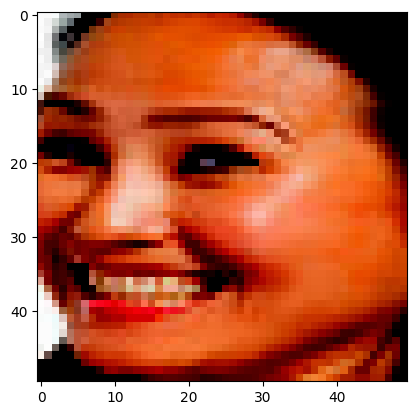

In [64]:
plt.imshow(new_patches[0])

In [45]:
face_landmarks = adjust_landmarks(face_landmarks, bboxes_batch)

In [47]:
# 5. We apply NMS again
bboxes_batch = smart_nms_from_bboxes(bboxes_batch, threshold=0.7, method="min", initial_sort=True)

In [49]:
def fix_bboxes_offsets(bboxes_batch, pad_param):
    bboxes_batch = bboxes_batch.copy()
    images_ids = np.unique(bboxes_batch[:, 0])

    for image_id, pad in zip(images_ids, pad_param):
        selector = bboxes_batch[:,0] == image_id
        

        bboxes_batch[np.ix_(selector, [1, 3, 6, 7, 8, 9, 10])] -= pad[1, 0]
        bboxes_batch[np.ix_(selector, [2, 4, 11, 12, 13, 14, 15])] -= pad[0, 0]

    return bboxes_batch

In [87]:
bboxes_batch[:, 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [52]:
#plt.imshow(images_normalized[1, 211:351, 233:335])

In [53]:
fix_bboxes_offsets(bboxes_batch, pad_param)

array([[   0.     ,  309.24649,   46.8707 ,  403.32599,  177.63086,
           1.     ,  330.08365,  372.34741,  350.02487,  330.47583,
         376.0415 ,   96.63644,   94.5265 ,  121.78923,  139.7626 ,
         138.5256 ],
       [   0.     ,   84.18523,  648.08569,  170.36224,  763.39062,
           1.     ,   97.24575,  141.46333,  117.94711,  100.60696,
         143.98305,  693.09387,  691.5722 ,  712.50238,  736.427  ,
         733.31915],
       [   0.     ,  766.42651,  455.84351,  856.47162,  571.74188,
           1.     ,  786.62146,  827.72888,  803.48358,  783.67407,
         830.94006,  499.45596,  500.69446,  526.75861,  536.10852,
         538.14825],
       [   0.     ,  988.99207,  455.53574, 1076.17383,  572.4068 ,
           0.99999,  999.43115, 1032.65588, 1003.49213,  999.88031,
        1034.85486,  500.60471,  501.74936,  525.20624,  539.87183,
         540.99615],
       [   0.     ,  764.58008,  645.03625,  857.95691,  760.45129,
           0.99998,  793.29498, 

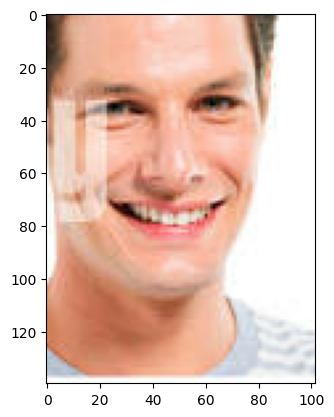

In [56]:
plt.imshow(images_raw[0].astype(int)[76:216, 80:182])

In [57]:
bbox = bboxes_batch[0]

In [58]:
bbox

array([  0.     , 309.24649,  46.8707 , 403.32599, 177.63086,   1.     ,
       330.08365, 372.34741, 350.02487, 330.47583, 376.0415 ,  96.63644,
        94.5265 , 121.78923, 139.7626 , 138.5256 ])

def parse_bbox(bbox, as_width_height=True):
    """
    Parses a bounding box from different formats (dict, list, or ndarray) into a standardized format.
    
    Args:
        bbox (dict, list, np.ndarray): Bounding box in one of the following formats:
                                       - dict with key 'box': [x1, y1, x2, y2]
                                       - list: [x1, y1, x2, y2] or [x1, y1, width, height]
                                       - np.ndarray: Shape (4,) or (5,) where the first value might be an index.
        as_width_height (bool): Whether to return the bounding box as [x1, y1, width, height] (default) or 
                                [x1, y1, x2, y2] if False.
    
    Returns:
        np.ndarray: Parsed bounding box in format [x1, y1, width, height] or [x1, y1, x2, y2].
    """
    # Extract box if input is a dict
    if isinstance(bbox, dict):
        bbox = bbox['box']
    
    # Parse list format
    if isinstance(bbox, list):
        x1, y1, x2_or_w, y2_or_h = bbox
        x2_or_w = x2_or_w if as_width_height else x2_or_w - x1
        y2_or_h = y2_or_h if as_width_height else y2_or_h - y1 
        return np.asarray([x1, y1, x2_or_w, y2_or_h]).round().astype(int)
    
    # Parse ndarray format
    if isinstance(bbox, np.ndarray):
        offset = 1 if bbox.shape[0] > 4 else 0  # Handle optional first element
        x1, y1, x2, y2 = bbox[offset:offset+4]
        x2_or_w = x2 - x1 if as_width_height else x2
        y2_or_h = y2 - y1 if as_width_height else y2
        return np.asarray([x1, y1, x2_or_w, y2_or_h]).round().astype(int)
    
    raise ValueError("Invalid bbox format. Expected dict, list, or ndarray.")



def plot_bbox(image, bbox, color="#FFFF00"):
    color = parse_color(color)
    bbox = parse_bbox(bbox, as_width_height=False)
    image = image.copy()

    # Vertical axis (left and right)
    image[bbox[1]: bbox[3], bbox[0], :] = color
    image[bbox[1]: bbox[3], bbox[2], :] = color
    
    # Horizontal axis (top and bottom)
    image[bbox[1], bbox[0]:bbox[2], :] = color
    image[bbox[3], bbox[0]:bbox[2], :] = color

    return image


def plot_landmarks(image, landmarks, color="#FFFF00", keypoints="nose,mouth_right,right_eye,left_eye,mouth_left", brush_size=2):
    keypoints = [k.strip() for k in keypoints.split(",")]
    
    color = parse_color(color)
    landmarks = parse_landmarks(landmarks)
    image = image.copy()


    for k in keypoints:
        target = landmarks[k]
        
        image[target[1]-brush_size:target[1]+brush_size, target[0]-brush_size: target[0]+brush_size] = color
        
    return image


def to_json(bboxes_batch):
    """
    Converts a batch of bounding boxes and facial keypoints into a JSON-friendly format.
    
    This function processes the bounding boxes grouped by unique image IDs, and formats each bounding box
    and its associated keypoints (facial landmarks) into a dictionary structure suitable for JSON serialization.
    
    Args:
        bboxes_batch (np.ndarray): An array of shape (n, 16) where each row represents a bounding box 
                                   and associated keypoints in the following format:
                                   [image_id, x1, y1, x2, y2, confidence, left_eye_x, left_eye_y, right_eye_x, 
                                   right_eye_y, nose_x, nose_y, mouth_left_x, mouth_left_y, mouth_right_x, mouth_right_y].
    
    Returns:
        list: A list of lists, where each inner list contains dictionaries for bounding boxes and keypoints 
              for a specific image. Each dictionary has the following structure:
              {
                "box": [x, y, width, height],
                "keypoints": {
                    "nose": [nose_x, nose_y],
                    "mouth_right": [mouth_right_x, mouth_right_y],
                    "right_eye": [right_eye_x, right_eye_y],
                    "left_eye": [left_eye_x, left_eye_y],
                    "mouth_left": [mouth_left_x, mouth_left_y]
                },
                "confidence": confidence_score
              }
    """
    unique_ids = np.unique(bboxes_batch[:, 0])

    result_batch = []
    
    # Loop over each unique image ID
    for unique_id in unique_ids:
        result = []
        bboxes_subset = bboxes_batch[bboxes_batch[:, 0] == unique_id]

        # Loop over each bounding box in the subset
        for bbox in bboxes_subset:
            result.append({
                "box": parse_bbox(bbox).tolist(),
                "keypoints": parse_landmarks(bbox),
                "confidence": bbox[5]
            })
        
        result_batch.append(result)
    
    return result_batch

In [59]:
bbox.shape

(16,)

In [60]:
bboxes_batch.shape

(36, 16)

In [61]:
def limit_bboxes(bboxes_batch, images_shapes, limit_landmarks=True):
    """
    Adjusts bounding boxes so that they fit within the boundaries of their corresponding images.
    If any bounding box exceeds the image dimensions, it will be corrected to stay within the limits.

    Args:
        bboxes_batch (np.ndarray): An array of bounding boxes of shape (n, 5), where each row
                                   represents [batch_index, x1, y1, x2, y2].
        images_shapes (np.ndarray): A tensor of image shapes of shape (batch, 3), where each row
                                    represents [width, height, channels] of each image in the batch.
        limit_landmarks (bool): A flag to specify whether the limit should also apply to landmarks or not.

    Returns:
        np.ndarray: The adjusted bounding boxes where no coordinate exceeds the image dimensions.
    """
    bboxes_batch_fitted = bboxes_batch.copy()

    # Get the original shapes (width, height) for each image in the batch
    expected_shapes = images_shapes[bboxes_batch_fitted[:, 0].astype(int)]

    # Adjust x1 and y1 to be within [0, width-1] and [0, height-1]
    bboxes_batch_fitted[:, 1] = np.minimum(np.maximum(bboxes_batch_fitted[:, 1], 0), expected_shapes[:, 0] - 1)
    bboxes_batch_fitted[:, 3] = np.minimum(np.maximum(bboxes_batch_fitted[:, 3], 0), expected_shapes[:, 1] - 1)

    # Adjust x2 and y2 to be within [0, width-1] and [0, height-1]
    bboxes_batch_fitted[:, 2] = np.minimum(np.maximum(bboxes_batch_fitted[:, 2], 0), expected_shapes[:, 0] - 1)
    bboxes_batch_fitted[:, 4] = np.minimum(np.maximum(bboxes_batch_fitted[:, 4], 0), expected_shapes[:, 1] - 1)

    if limit_landmarks:
    
        # Adjust x1..x5 of the landmarks to not surpass boundaries
        bboxes_batch_fitted[:, 6:11] = np.minimum(np.maximum(bboxes_batch_fitted[:, 6:11], 0), expected_shapes[:, 0:1] - 1)
    
        # Adjust y1..y5 of the landmarks to not surpass boundaries
        bboxes_batch_fitted[:, 11:16] = np.minimum(np.maximum(bboxes_batch_fitted[:, 11:16], 0), expected_shapes[:, 1:2] - 1)

    return bboxes_batch_fitted


In [62]:
bboxes_batch[-1, -1] = -300

In [63]:
limit_bboxes(bboxes_batch, images_oshapes)

array([[   0.     ,  309.24649,   46.8707 ,  403.32599,  177.63086,
           1.     ,  330.08365,  372.34741,  350.02487,  330.47583,
         376.0415 ,   96.63644,   94.5265 ,  121.78923,  139.7626 ,
         138.5256 ],
       [   0.     ,   84.18523,  648.08569,  170.36224,  763.39062,
           1.     ,   97.24575,  141.46333,  117.94711,  100.60696,
         143.98305,  693.09387,  691.5722 ,  712.50238,  736.427  ,
         733.31915],
       [   0.     ,  766.42651,  455.84351,  856.47162,  571.74188,
           1.     ,  786.62146,  827.72888,  803.48358,  783.67407,
         830.94006,  499.45596,  500.69446,  526.75861,  536.10852,
         538.14825],
       [   0.     ,  988.99207,  455.53574, 1076.17383,  572.4068 ,
           0.99999,  999.43115, 1032.65588, 1003.49213,  999.88031,
        1034.85486,  500.60471,  501.74936,  525.20624,  539.87183,
         540.99615],
       [   0.     ,  764.58008,  645.03625,  857.95691,  760.45129,
           0.99998,  793.29498, 

In [65]:
bboxes_batch

array([[  0.     , 277.72781,  89.02806, 326.63281, 154.58966,   0.99702,
        290.66376, 313.92761, 303.5657 , 296.33728, 313.40692, 116.44417,
        113.63571, 130.86598, 142.5881 , 140.68755],
       [  0.     , 516.2428 , 370.91638, 551.6925 , 410.97037,   0.72956,
        530.55554, 542.67084, 537.97327, 534.48395, 544.18616, 387.8898 ,
        385.24078, 397.52487, 402.63107, 400.87259]])

In [57]:
to_json(bboxes_batch)

[[{'box': [278, 89, 49, 66],
   'keypoints': {'nose': [304, 131],
    'mouth_right': [313, 141],
    'right_eye': [314, 114],
    'left_eye': [291, 116],
    'mouth_left': [296, 143]},
   'confidence': 0.9970241189002991},
  {'box': [516, 371, 35, 40],
   'keypoints': {'nose': [538, 398],
    'mouth_right': [544, 401],
    'right_eye': [543, 385],
    'left_eye': [531, 388],
    'mouth_left': [534, 403]},
   'confidence': 0.7295562624931335}]]

In [52]:
from mtcnn.utils.plot import plot_bbox, plot_landmarks

In [ ]:
class MTCNN:
    def __init__(self, weights_pnet="pnet.lz4", weights_rnet="rnet.lz4", weights_onet="onet.lz4")    
        self._pnet = PNet()
        self._rnet = PNet()
        self._onet = PNet()

        self._pnet.build()
        self._rnet.build()
        self._onet.build()
        
        pnet.set_weights(load_weights(weights_pnet))
        rnet.set_weights(load_weights(weights_rnet))
        onet.set_weights(load_weights(weights_onet))
        
    def detect_faces(self, image, threshold_)